<a href="https://colab.research.google.com/github/SparshKapoor-CODER/PyTorch/blob/main/Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Create a Model Class that inherits nn.Module

In [67]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from sklearn.model_selection import train_test_split

In [68]:
class Model(nn.Module):
    # input layer
    def __init__(self , in_features=4, h1=8, h2=9, out_features=3):
       super().__init__()
       self.fc1 = nn.Linear(in_features , h1)   # fc means Fully Connected
       self.fc2 = nn.Linear(h1 , h2)
       self.out = nn.Linear(h2 , out_features)


    def forward(self , x):
        x = F.relu(self.fc1(x))   # Rectified Liner Unit
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [69]:
torch.manual_seed(379)
model = Model()

We are using iris dataset to train our modal

In [70]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
My_DataFrame = pd.read_csv(url)

changing last Columns names with numbers

In [71]:
My_DataFrame['species']= My_DataFrame['species'].replace('setosa',0.0)
My_DataFrame['species']= My_DataFrame['species'].replace('versicolor',1.0)
My_DataFrame['species']= My_DataFrame['species'].replace('virginica',2.0)

<ipython-input-71-8a75b098b9cf>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  My_DataFrame['species']= My_DataFrame['species'].replace('virginica',2.0)


Training the modal

In [72]:
X = My_DataFrame.drop('species' , axis=1).values
y = My_DataFrame['species'].values

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=33)

X_train = torch.tensor(X_train, dtype=torch.float32) # Convert to PyTorch FloatTensor
X_test = torch.tensor(X_test, dtype=torch.float32)   # Convert to PyTorch FloatTensor


# 30% is used to tarin and remaining 70% is used to test the dataset

In [74]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

Set the criterion of measure the error, how far off the pridictions are from the data

In [75]:
criterion = nn.CrossEntropyLoss()

Choose opitmizer

In [76]:
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [77]:
epochs = 200
losses = []
for i in range(epochs):
  y_predict = model.forward(X_train)
  # measure loss
  loss = criterion(y_predict , y_train)
  losses.append(loss.detach().numpy())
  if i % 5 ==0 :
    print(f'Epoch {i} and loss is {loss}')
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch 0 and loss is 1.1930252313613892
Epoch 5 and loss is 1.0899169445037842
Epoch 10 and loss is 1.0196130275726318
Epoch 15 and loss is 0.9354188442230225
Epoch 20 and loss is 0.8345867991447449
Epoch 25 and loss is 0.7210215330123901
Epoch 30 and loss is 0.5987496972084045
Epoch 35 and loss is 0.4999622404575348
Epoch 40 and loss is 0.4344976246356964
Epoch 45 and loss is 0.38388124108314514
Epoch 50 and loss is 0.33482974767684937
Epoch 55 and loss is 0.2836959958076477
Epoch 60 and loss is 0.23403450846672058
Epoch 65 and loss is 0.19005101919174194
Epoch 70 and loss is 0.15510565042495728
Epoch 75 and loss is 0.12943102419376373
Epoch 80 and loss is 0.11160433292388916
Epoch 85 and loss is 0.09947135299444199
Epoch 90 and loss is 0.090871162712574
Epoch 95 and loss is 0.08457309007644653
Epoch 100 and loss is 0.07986211031675339
Epoch 105 and loss is 0.07616643607616425
Epoch 110 and loss is 0.07312706857919693
Epoch 115 and loss is 0.07056967914104462
Epoch 120 and loss is 0.06

Back Propogation

Text(0.5, 0, 'Epoch')

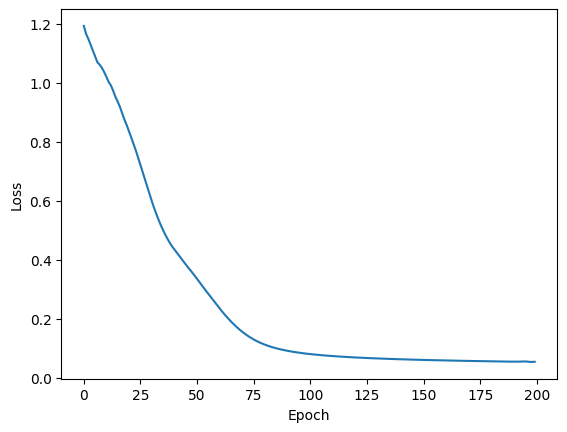

In [78]:
plt.plot(range(epochs),losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

Evaluate Model on Test Data Set

In [79]:
with torch.no_grad():   # turn off back prpogation
  y_eval = model.forward(X_test)
  loss = criterion(y_eval , y_test)

In [83]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model(data)
    print(f'{i+1:2}. {str(y_val):38} {y_test[i]}  {y_val.argmax().item()}')

    # Correct or not

    if(y_val.argmax().item() == y_test[i]):
      correct += 1

print(f'we got {correct} correct')

 1. tensor([-3.9501,  5.7571, -1.3320])    1  1
 2. tensor([-3.9421,  6.3475, -1.8816])    1  1
 3. tensor([  8.9920,   2.0870, -10.5221]) 0  0
 4. tensor([-6.4921,  5.7640,  0.9547])    1  1
 5. tensor([-10.1751,   3.1499,   6.3062]) 2  2
 6. tensor([-14.4225,  -0.4378,  12.8034]) 2  2
 7. tensor([  9.0877,   2.2440, -10.7614]) 0  0
 8. tensor([  9.9021,   2.0720, -11.3806]) 0  0
 9. tensor([-10.3372,   2.9946,   6.5143]) 2  2
10. tensor([-12.6569,   1.7031,   9.5581]) 2  2
11. tensor([-13.3088,   1.1494,  10.5744]) 2  2
12. tensor([  8.7197,   1.8789, -10.0653]) 0  0
13. tensor([-12.5485,   0.8397,  10.1290]) 2  2
14. tensor([-6.2820,  5.4261,  1.0353])    1  1
15. tensor([-11.0330,   2.7661,   7.2856]) 2  2
16. tensor([-3.9682,  6.1574, -1.6851])    1  1
17. tensor([-8.3052,  3.6900,  4.1751])    2  2
18. tensor([  9.9960,   2.0985, -11.4955]) 0  0
19. tensor([-5.6256,  5.6593,  0.2315])    1  1
20. tensor([-11.3595,   3.3929,   7.0925]) 2  2
21. tensor([  9.1238,   2.1043, -10.6647